In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7, 10)

In [ ]:
iris = datasets.load_iris()

In [ ]:
x = iris.data[:, [2, 3]]
y = iris.target

print(type(x), type(y), x.shape, y.shape)
print(set(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (150, 2) (150,)
{0, 1, 2}


In [ ]:
from sklearn.model_selection._split import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(105, 2) (45, 2) (105,) (45,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
sc.fit(x_test)
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=100)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

분류 정확도 출력1 : 0.600
새로운 값으로 예측 :  [0 0 2]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

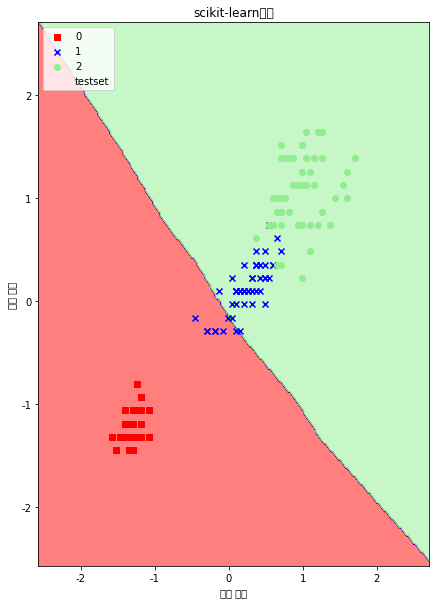

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)  # 검정자료는 test

# 분류 정확도
print('분류 정확도 출력1 : %.3f'%accuracy_score(y_test, y_pred))  

# 새로운 값으로 예측
new_data = np.array([[5.1, 2.4], [1.1, 1.4], [8.1, 8.4]])

# 표준화
sc.fit(new_data)
new_data = sc.transform(new_data)
new_pred = model.predict(new_data)
print('새로운 값으로 예측 : ', new_pred)  # 새로운 값으로 예측 :  [1 0 2]

#* 붓꽃 자료에 대한 로지스틱 회귀 결과를 차트로 그리기 *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import font_manager, rc
plt.rc('font', family='malgun gothic')      
plt.rcParams['axes.unicode_minus']= False

def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02, title=''):
    markers = ('s', 'x', 'o', '^', 'v')  # 점 표시 모양 5개 정의
    colors = ('r', 'b', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #print('cmap : ', cmap.colors[0], cmap.colors[1], cmap.colors[2])

    # decision surface 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # xx, yy를 ravel()를 이용해 1차원 배열로 만든 후 전치행렬로 변환하여 퍼셉트론 분류기의 
    # predict()의 인자로 입력하여 계산된 예측값을 Z로 둔다.
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)
    Z = Z.reshape(xx.shape)   # Z를 reshape()을 이용해 원래 배열 모양으로 복원한다.
    
    # X를 xx, yy가 축인 그래프 상에 cmap을 이용해 등고선을 그림
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    X_test = X[test_idx, :]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)
       
    if test_idx:
        X_test = X[test_idx, :]
        plt.scatter(X_test[:, 0], X_test[:, 1], c=[], linewidth=1, marker='o', s=80, label='testset')
    
    plt.xlabel('꽃잎 길이')
    plt.ylabel('꽃잎 너비')
    plt.legend(loc=2)
    plt.title(title)
    plt.show()

x_combined_std = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_region(X=x_combined_std, y=y_combined, classifier=model, test_idx=range(105, 150), title='scikit-learn제공') 